In [1]:
!pip install --upgrade scikit-learn==0.20.3
import pandas as pd
import graphviz 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

     |████████████████████████████████| 5.4MB 2.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


# Gini

In [4]:
data = pd.read_csv('seeds_dataset.txt', sep="	", header=None)
data.columns = ["area", "Perimeter", "Compactness", "Length of Kernel","Width of Kernel","Asymmetry Coefficient","Length of Kernel Grove","Class"]
feature_cols = ["area", "Perimeter", "Compactness", "Length of Kernel","Width of Kernel","Asymmetry Coefficient","Length of Kernel Grove"]
X = data[feature_cols] 
y = data.Class
print(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



      area  Perimeter  ...  Length of Kernel Grove  Class
0    15.26      14.84  ...                   5.220      1
1    14.88      14.57  ...                   4.956      1
2    14.29      14.09  ...                   4.825      1
3    13.84      13.94  ...                   4.805      1
4    16.14      14.99  ...                   5.175      1
..     ...        ...  ...                     ...    ...
205  12.19      13.20  ...                   4.870      3
206  11.23      12.88  ...                   5.003      3
207  13.20      13.66  ...                   5.056      3
208  11.84      13.21  ...                   5.044      3
209  12.30      13.34  ...                   5.063      3

[210 rows x 8 columns]
Accuracy: 0.9365079365079365


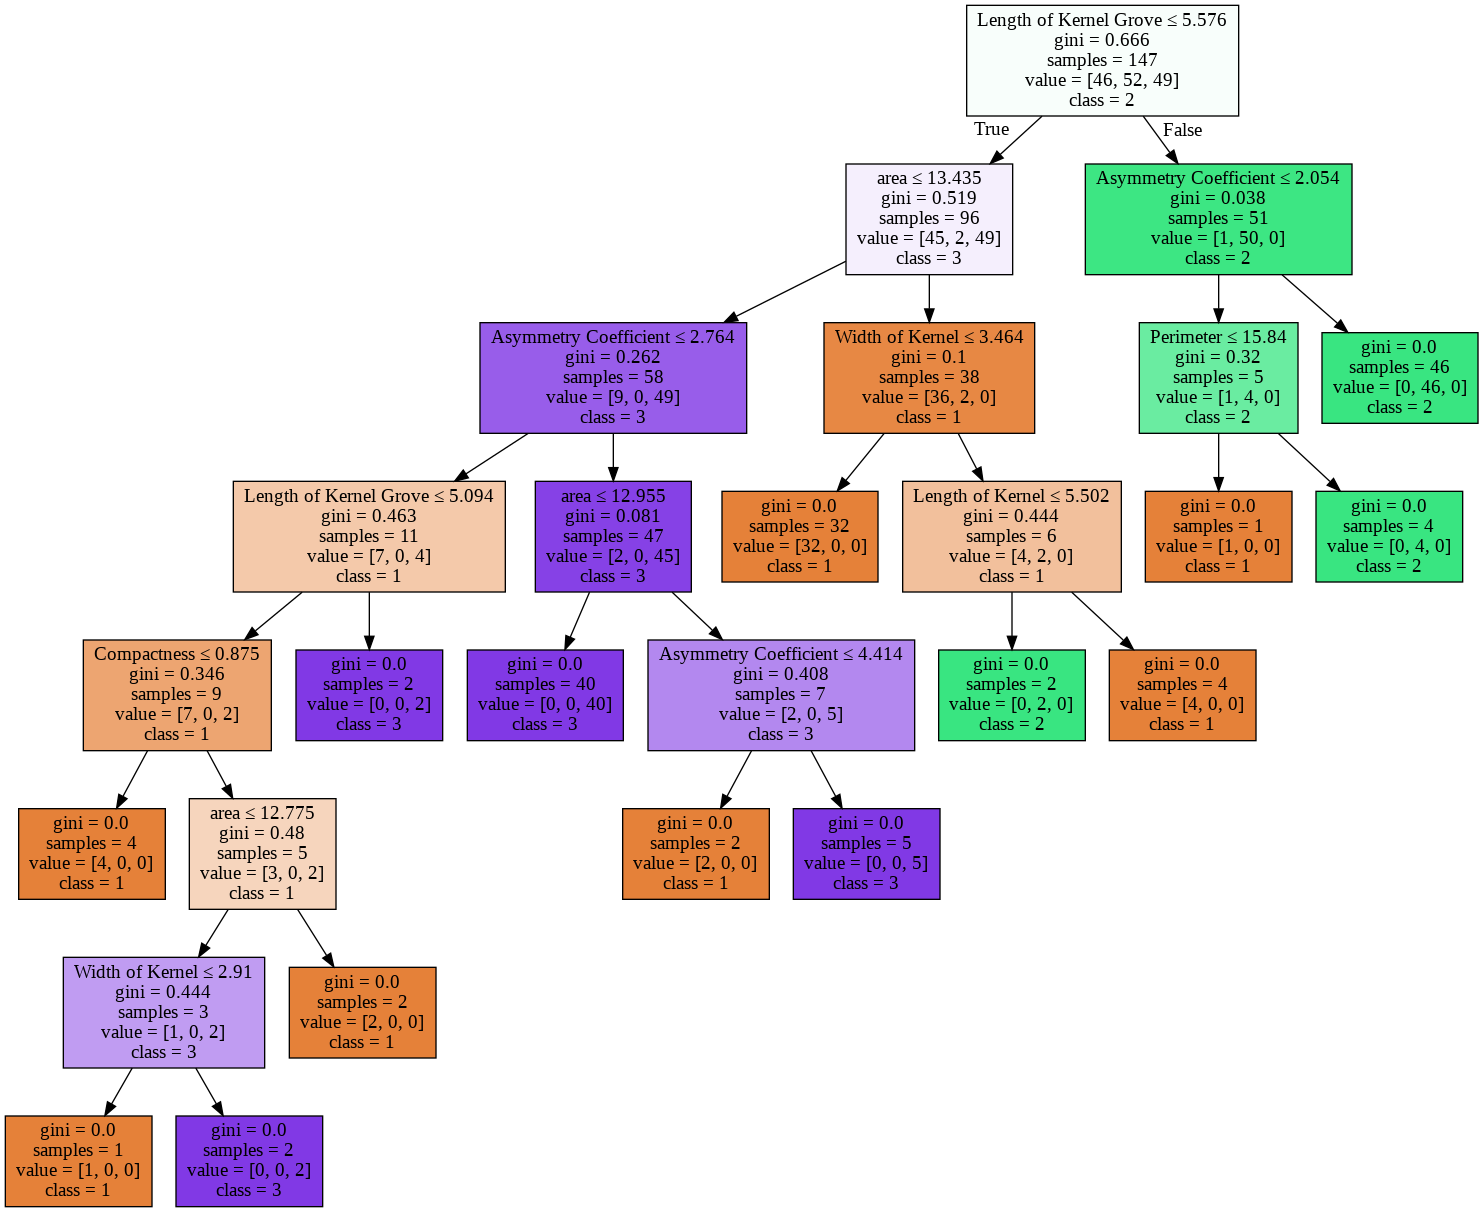

In [5]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=False,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Entropy

In [7]:
clf_entropy=DecisionTreeClassifier(criterion='entropy')
dt_entropy=clf_entropy.fit(X_train,y_train)
dt_entropy

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

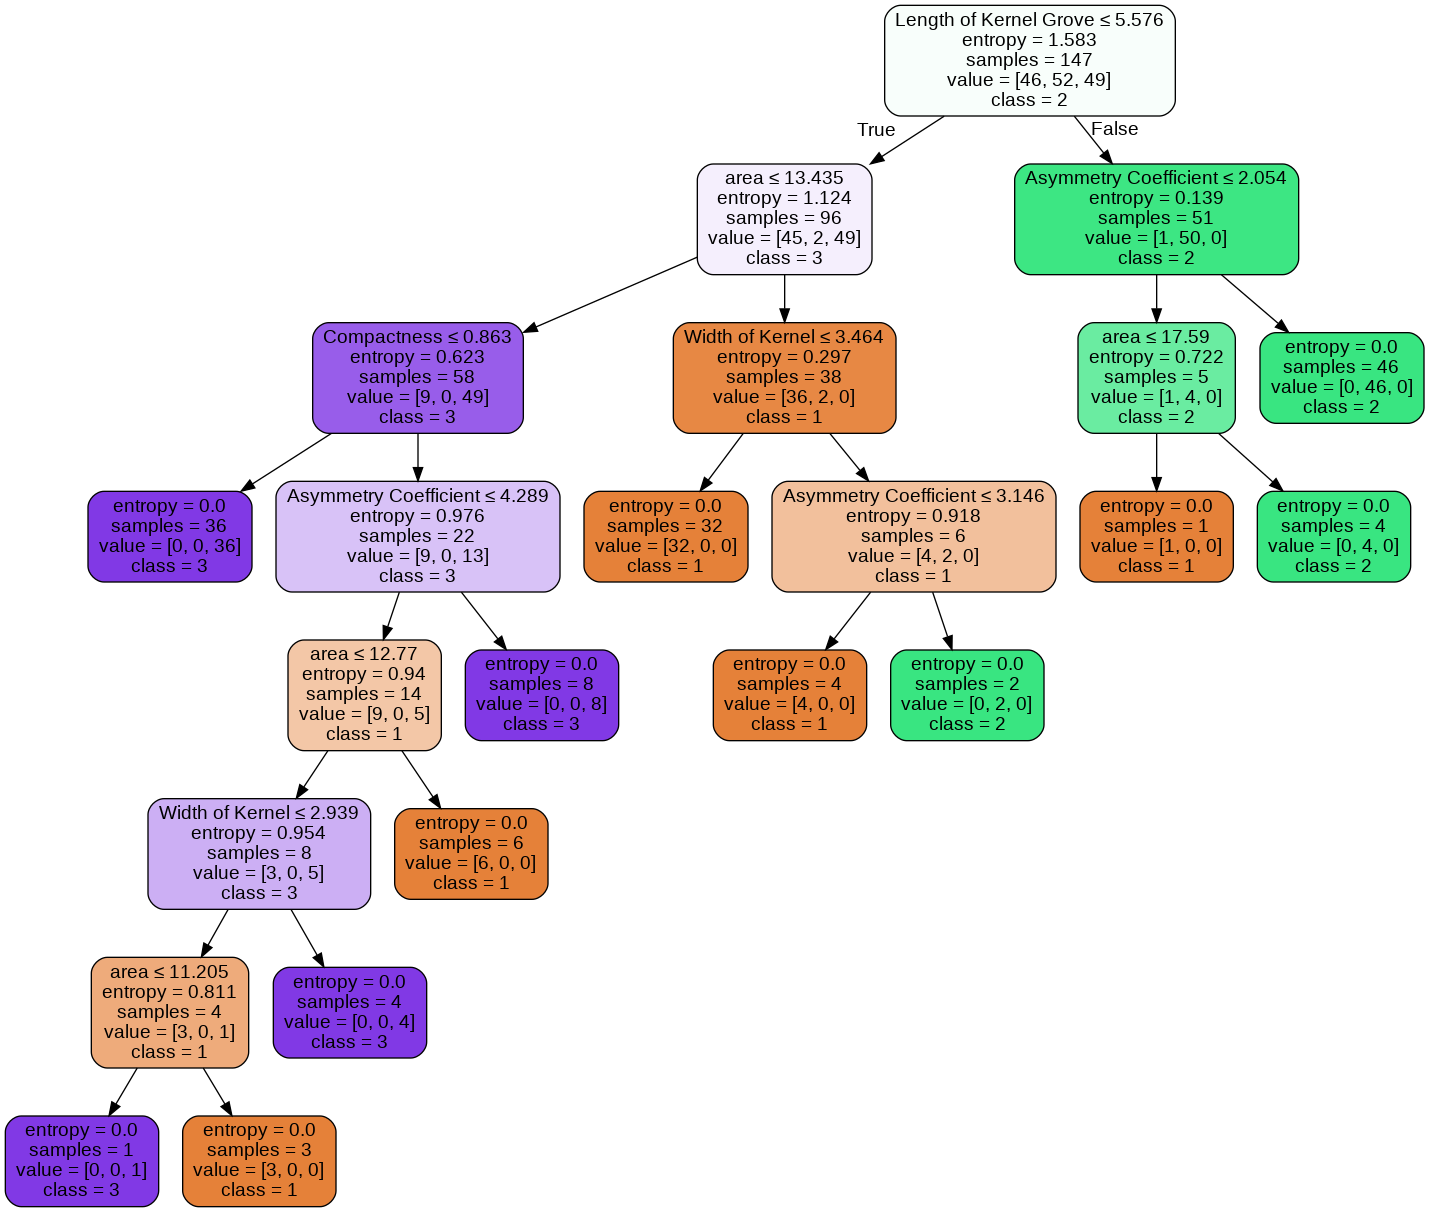

In [10]:
dot_data_entropy=StringIO()
export_graphviz(dt_entropy,out_file=dot_data_entropy,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['1','2','3'])
graph_entropy=pydotplus.graph_from_dot_data(dot_data_entropy.getvalue())
graph_entropy.write_jpg('train_entropy.jpg')
Image(graph_entropy.create_png())

In [13]:
y_pred_entropy=clf_entropy.predict(X_test)
print("Accuracy : ",(metrics.accuracy_score(y_test,y_pred_entropy)))

Accuracy :  0.9206349206349206
